<a href="https://colab.research.google.com/github/Dalazen/IA/blob/main/Arvore_de_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split

In [85]:
df = pd.read_csv('name_gender_dataset.csv')
y = df['Gender']
df.drop(columns=['Gender'], inplace=True)

In [86]:
y

0         M
1         M
2         M
3         M
4         M
         ..
147264    M
147265    M
147266    M
147267    M
147268    M
Name: Gender, Length: 147269, dtype: object

In [87]:
df

,Name,Count,Probability
0,James,5304407,1.451679e-02
1,John,5260831,1.439753e-02
2,Robert,4970386,1.360266e-02
3,Michael,4579950,1.253414e-02
4,William,4226608,1.156713e-02
...,...,...,...
147264,Zylenn,1,2.736740e-09
147265,Zymeon,1,2.736740e-09
147266,Zyndel,1,2.736740e-09
147267,Zyshan,1,2.736740e-09


In [88]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0, stratify=y)

In [92]:
y = y_train
y_str = y.astype('category')
y_str = y_str.cat.codes

In [93]:
X_train.Count = X_train.Count.astype(int)
X_train.Probability = X_train.Probability.astype(float)

X_test.Count = X_test.Count.astype(int)
X_test.Probability = X_test.Probability.astype(float)

for c in X_train.columns:
    if type(X_train[c].iloc[0]) == str:
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes


In [94]:
for c in X_test.columns:
    # print(X_test[c].iloc[0])
    if type(X_test[c].iloc[0]) == str:
        X_test[c] = X_test[c].astype('category')
        X_test[c] = X_test[c].cat.codes

In [95]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [96]:
preds = clf.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
accuracy

0.6072972544759059

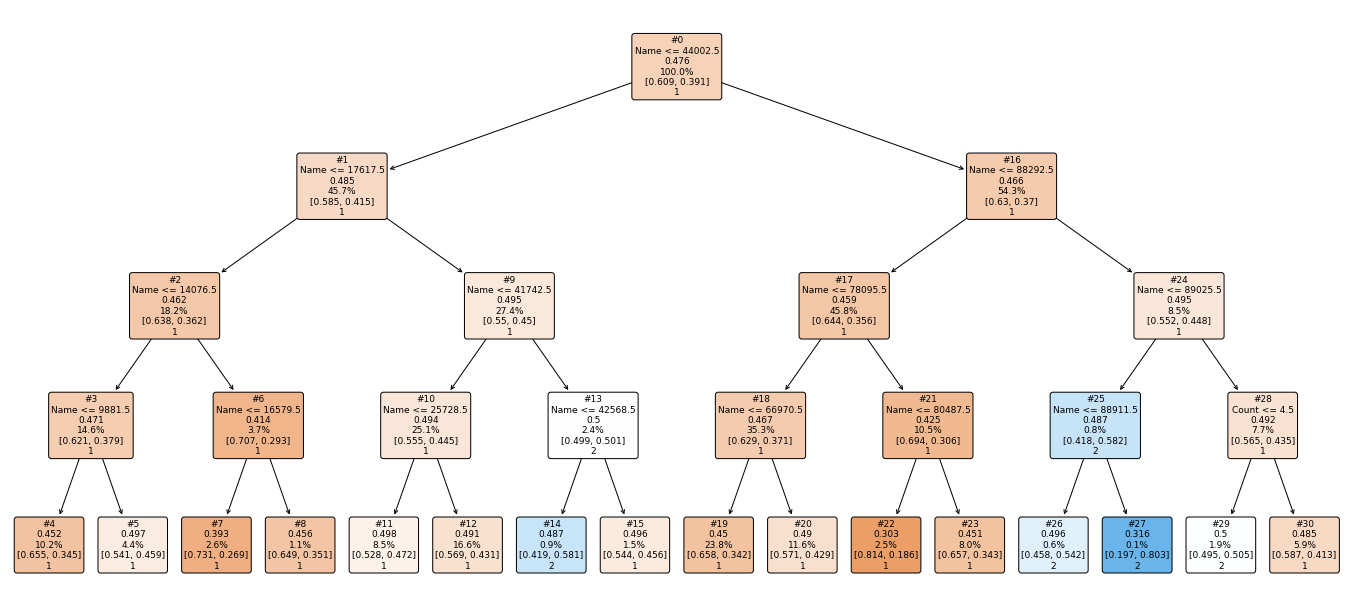

In [98]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(24,11))
plt.title('teste')
tree.plot_tree(clf, label=None, node_ids=True, rounded=True, fontsize=9,
               feature_names=X_train.columns, filled=True,
               class_names=["1", "2"], proportion=True)
# plt.savefig('decision_tree.png', format='png')
plt.show()